# Lab 5: Introduction to spaCy

**Credit**: Dr. Preeti Jagadev and Dr. Jeff Stanton

SpaCy is an open source natural language processing library written by  Matthew Honnibal and Ines Montani. Most of spaCy is written natively in Python. Unlike NLTK, which was designed for teaching and research, spaCy was created from the start to support production applications: real world activities that require natural language processing. SpaCy uses a "pipeline" metaphor such that input documents and data go through a variety of typical processing stages where each stage feeds into the next one. Examples of these stages include tokenization, part of speech tagging, named entity recognition, and transformation into word vectors.

Try searching for "spaCy" on Kaggle.com. At this writing there were more than 4600 projects that used spaCy. Part of the appeal is that spaCy makes it easy to get started with a project. SpaCy contains support for dozens of different languages and its integration with word- and sentence-embedding approaches provides access to the advantages of pre-trained deep learning models.

In this lab you will get a comprehensive view of the architecture and capabilities of spaCy.

Sections of this lab:
- Basics: Getting Started
- Lemmatization
- Token Extracting / Removing / Transforming
- Sentence Segmentation
- Part of Speech Tagging
- Named Entity Recognition
- Dependency Parsing
- Word Vectors
- Sentence Similarity
- Customizing pipeline components

# Section 5.1: Basics: Getting Started

In [1]:
# Every spaCy project begins with importing the package and
# instantiating a processing object that is initialized with a particular language model.
# In this case we will start with a small English pipeline trained from text harvested from the web.
import spacy
nlp = spacy.load("en_core_web_sm") #Loads a small English language model that spaCy uses to understand English text (it knows words, grammar, parts of speech, etc.).
type(nlp)

spacy.lang.en.English

In [2]:
# There are lots of things this object can do. Let's use dir to get a list of them:
[m for m in dir(nlp) if m[0] != "_"]

['Defaults',
 'add_pipe',
 'analyze_pipes',
 'batch_size',
 'begin_training',
 'component',
 'component_names',
 'components',
 'config',
 'create_optimizer',
 'create_pipe',
 'create_pipe_from_source',
 'default_config',
 'default_error_handler',
 'disable_pipe',
 'disable_pipes',
 'disabled',
 'enable_pipe',
 'evaluate',
 'factories',
 'factory',
 'factory_names',
 'from_bytes',
 'from_config',
 'from_disk',
 'get_factory_meta',
 'get_factory_name',
 'get_pipe',
 'get_pipe_config',
 'get_pipe_meta',
 'has_factory',
 'has_pipe',
 'initialize',
 'lang',
 'make_doc',
 'max_length',
 'memory_zone',
 'meta',
 'path',
 'pipe',
 'pipe_factories',
 'pipe_labels',
 'pipe_names',
 'pipeline',
 'rehearse',
 'remove_pipe',
 'rename_pipe',
 'replace_listeners',
 'replace_pipe',
 'resume_training',
 'select_pipes',
 'set_error_handler',
 'set_factory_meta',
 'to_bytes',
 'to_disk',
 'tokenizer',
 'update',
 'use_params',
 'vocab']

Note that all of the methods shown above pertain to pipelines - a modular sequence of processing steps. In general these follow a standard order:

* Tokenizer
* Part of speech tagger
* Dependency parser (organizes each sentence into its constituent parts)
* Named entity recognizer
* Lemmatizer
* Additional elements (including document classification)

You know enough of the essential foundations of NLP to know why these pipeline elements appear in this order. For example, you could not apply part of speech tags to words without first tokenizing the raw text.  


In [3]:
# At the most basic level, and at the beginning of most NLP pipelines, we tokenize a document:
doc = nlp("Hello World!") # This is the most basic way to use the instance
type(doc), len(doc) # What is the result?

(spacy.tokens.doc.Doc, 3)

In [4]:
# A spaCy "tokens-doc" behaves like a list, such that we can use a list comprehension
# to access the individual tokens in the document:
[token.text for token in doc]

['Hello', 'World', '!']

In [5]:
# And because it behaves like a list, we can also use slicing to get access to the individual tokens.
first_token = doc[0] # Slice the first token
print(type(first_token)) # What is its type?
print(first_token.text) # Show the text of the token

<class 'spacy.tokens.token.Token'>
Hello


In [6]:
# In spaCy terminology, a span is any contiguous set of tokens.
# Spans are often used to break up a document into sentences.
# Here we are just using slicing to create a span with the first two of our three tokens.
span = doc[0:2]
[token.text for token in span]

['Hello', 'World']

In [7]:
# For this first exercise, tokenize a longer text excerpted from Wikipedia.
# Use slicing to show the first five tokens:

longtext = """A neural network is either a biological neural network or an
artificial neural network for solving artificial intelligence (AI) problems.
The connections of the biological neuron are modeled as weights. A positive
weight reflects an excitatory connection, while negative values mean
inhibitory connections."""

# Question 5.1: Tokenize longtext:

# Solution
NN_doc = nlp(longtext) # This is the most basic way to use the instance


In [8]:
token_list = [token.text for token in NN_doc]

In [9]:
print(token_list)

['A', 'neural', 'network', 'is', 'either', 'a', 'biological', 'neural', 'network', 'or', 'an', '\n', 'artificial', 'neural', 'network', 'for', 'solving', 'artificial', 'intelligence', '(', 'AI', ')', 'problems', '.', '\n', 'The', 'connections', 'of', 'the', 'biological', 'neuron', 'are', 'modeled', 'as', 'weights', '.', 'A', 'positive', '\n', 'weight', 'reflects', 'an', 'excitatory', 'connection', ',', 'while', 'negative', 'values', 'mean', '\n', 'inhibitory', 'connections', '.']


In [10]:
# Question 5.2: Display the *texts* of tokens in a span consisting of the first 5 tokens.

# Solution
print(token_list[0:5])

['A', 'neural', 'network', 'is', 'either']


In [11]:
# Question 5.3: Use Python slicing notation to show the *last* 5 tokens.

# Solution
print(token_list[-5:])

['mean', '\n', 'inhibitory', 'connections', '.']


In [12]:
# SpaCy uses the language model to make better tokenization decisions.
# Let's compare spaCy tokenization with the primitive use of split().
# Remember that split() defaults to splitting on spaces.
headline = "Rare Bird’s Detection Highlights Promise of ‘Environmental DNA’"
splitspacy = nlp(headline) # Use spaCy tokenization
splitspace = headline.split() # Use simple splitting on spaces
print("SpaCy tokens:")
print([t.text for t in splitspacy])
print(len(splitspacy), "tokens.")

print("\nSimple splitting:")
print([s for s in splitspace])
print(len(splitspace), "tokens.")

SpaCy tokens:
['Rare', 'Bird', '’s', 'Detection', 'Highlights', 'Promise', 'of', '‘', 'Environmental', 'DNA', '’']
11 tokens.

Simple splitting:
['Rare', 'Bird’s', 'Detection', 'Highlights', 'Promise', 'of', '‘Environmental', 'DNA’']
8 tokens.


In [13]:
# Question 5.4:
# Why do you think it might be helpful to tokenize the possessive "Bird's" into two tokens?
# Add a comment that explains your reasoning.
# Then find or write a new sentence that contains a hyphenated noun phrase. How does spaCy treat that?

# This would be helpful since the 2 tokens will provide more clarity that Bird means the singular animal, while 'S is for possession
# Spacy treats each part of the hyphenated noun as its own token e.g. mother-in-law has 5
# Solution

sentence = "My mother-in-law is coming over this weekend"
splitspacy = nlp(sentence) # Use spaCy tokenization

print("SpaCy tokens:")
print([t.text for t in splitspacy])
print(len(splitspacy), "tokens.")


SpaCy tokens:
['My', 'mother', '-', 'in', '-', 'law', 'is', 'coming', 'over', 'this', 'weekend']
11 tokens.


# Section 5.2: Lemmatization

Lemmatization is the process of reducing inflected forms, sometimes derivationally related forms of a word to a common base form. This reduced form or root word is called a lemma. Lemmas have an advantage over simple stemming: Lemmas are always dictionary words. Lemmatizing can be a valuable data reduction technique because it aggregates various inflective forms of a word down to a single root.

In [14]:
# Demonstrate spaCy lemmatization with a verb form
text = "I am, you are, and he is." # All the verbs are variations on the verb "to be"
[token.lemma_ for token in nlp(text)]

['I', 'be', ',', 'you', 'be', ',', 'and', 'he', 'be', '.']

In [15]:
# Question 5.5:
# Use token.lemma instead of token.lemma_
# Write a comment describing what you see.
# These values are ID numbers for spaCy's "StringStore." More information here:
# https://spacy.io/usage/spacy-101#vocab

# 10 numbers that apparently correspond to the individual words/ tokens

# Solution
[token.lemma for token in nlp(text)]

[4690420944186131903,
 10382539506755952630,
 2593208677638477497,
 7624161793554793053,
 10382539506755952630,
 2593208677638477497,
 2283656566040971221,
 1655312771067108281,
 10382539506755952630,
 12646065887601541794]

In [16]:
# Here's another example
text = "Look! It looks like he looked."
doc = nlp(text)
for token in doc:
    print("token:{} -> lemma:{}".format(token.text,token.lemma_ ))

token:Look -> lemma:look
token:! -> lemma:!
token:It -> lemma:it
token:looks -> lemma:look
token:like -> lemma:like
token:he -> lemma:he
token:looked -> lemma:look
token:. -> lemma:.


In [17]:
# Question 5.6:
# Add your own example, this time using different forms of a noun

# Solution
sentence = "He loves to eat, and depite eating earlier, ate the half eaten pizza"

doc = nlp(sentence)
for token in doc:
    print("token:{} -> lemma:{}".format(token.text,token.lemma_ ))

token:He -> lemma:he
token:loves -> lemma:love
token:to -> lemma:to
token:eat -> lemma:eat
token:, -> lemma:,
token:and -> lemma:and
token:depite -> lemma:depite
token:eating -> lemma:eat
token:earlier -> lemma:early
token:, -> lemma:,
token:ate -> lemma:eat
token:the -> lemma:the
token:half -> lemma:half
token:eaten -> lemma:eat
token:pizza -> lemma:pizza


# Section 5.3: Token Extracting / Removing / Transforming

Here's an overview of all of the bound methods and attributes that a token has. When creating a NLP pipeline, it is helpful not to have to write our own code to find out these things.

|Attribute Name	|Type|Description                                                                    |
|:--------------------:|:---------:|:------------------------------------------------------------------------------------------------------------------------------------:|
| lemma              | int     | Base form of the token, with no inflectional suffixes.                                                                             |
| lemma_             | unicode | Base form of the token, with no inflectional suffixes.                                                                             |
| norm               | int     | The token’s norm, i.e. a normalized form of the token text. Usually set in the language’s tokenizer exceptions or norm exceptions. |
| norm_              | unicode | The token’s norm, i.e. a normalized form of the token text. Usually set in the language’s tokenizer exceptions or norm exceptions. |
| lower              | int     | Lowercase form of the token.                                                                                                       |
| lower_             | unicode | Lowercase form of the token text. Equivalent to Token.text.lower().                                                                |
| shape              | int     | Transform of the tokens’s string, to show orthographic features. For example, “Xxxx” or “dd”.                                      |
| shape_             | unicode | Transform of the tokens’s string, to show orthographic features. For example, “Xxxx” or “dd”.                                      |
| prefix             | int     | Hash value of a length-N substring from the start of the token. Defaults to N=1.                                                   |
| prefix_            | unicode | A length-N substring from the start of the token. Defaults to N=1.                                                                 |
| suffix             | int     | Hash value of a length-N substring from the end of the token. Defaults to N=3.                                                     |
| suffix_            | unicode | Length-N substring from the end of the token. Defaults to N=3.                                                                     |
| is_alpha           | bool    | Does the token consist of alphabetic characters? Equivalent to token.text.isalpha().                                               |
| is_ascii           | bool    | Does the token consist of ASCII characters? Equivalent to all(ord(c) < 128 for c in token.text).                                   |
| is_digit           | bool    | Does the token consist of digits? Equivalent to token.text.isdigit().                                                              |
| is_lower           | bool    | Is the token in lowercase? Equivalent to token.text.islower().                                                                     |
| is_upper           | bool    | Is the token in uppercase? Equivalent to token.text.isupper().                                                                     |
| is_title           | bool    | Is the token in titlecase? Equivalent to token.text.istitle().                                                                     |
| is_punct           | bool    | Is the token punctuation?                                                                                                          |
| is_left_punct      | bool    | Is the token a left punctuation mark, e.g. (?                                                                                      |
| is_right_punct     | bool    | Is the token a right punctuation mark, e.g. )?                                                                                     |
| is_space           | bool    | Does the token consist of whitespace characters? Equivalent to token.text.isspace().                                               |
| is_bracket         | bool    | Is the token a bracket?                                                                                                            |
| is_quote           | bool    | Is the token a quotation mark?                                                                                                     |
| is_currency V2.0.8 | bool    | Is the token a currency symbol?                                                                                                    |
| like_url           | bool    | Does the token resemble a URL?                                                                                                     |
| like_num           | bool    | Does the token represent a number? e.g. “10.9”, “10”, “ten”, etc.                                                                  |
| like_email         | bool    | Does the token resemble an email address?                                                                                          |

### Extracting

The list of attributes that spaCy makes available on the token object provide a variety of type tests.

The **is_ attributes** allow testing for alpahnumeric, uppercase, title case, left punctuation mark, right punctuation mark, any punctuation mark, a bracket, a quote mark or a currency symbol. These are all very helpful in navigating within a string of tokens.

There are also three "**like**" attributes that show if a token looks like a web address, a numeric string, or an email address.

Let's run some tests on a long and complex sentence from Wikipedia:

In [18]:
text='''An information retrieval technique using latent semantic structure was
patented in 1988 (US Patent 4,839,853, now expired) by Scott Deerwester,
Susan Dumais, George Furnas, Richard Harshman, Thomas Landauer, Karen Lochbaum
and Lynn Streeter. In the context of its application to information retrieval,
it is sometimes called latent semantic indexing (LSI).'''

In [19]:
my_list=[] # Initialize a blank list
doc = nlp(text) # Tokenize the text string
for token in doc: # Check each token
    if token.is_punct: # Run the bound method
        my_list.append(token) # Append to the list

for item in my_list: # Review each item in the list
    print(item) # Print the item

(
,
)
,
,
,
,
,
.
,
(
)
.


In [20]:
# Now do something similar but use a list comprehension
[tok for tok in doc if tok.is_left_punct]

[(, (]

In [21]:
# Question 5.7: Use the bound method to detect and print right puncutation.

# Solution:
[tok for tok in doc if tok.is_right_punct]

[), )]

In [22]:
# Question 5.8: Use the bound method to detect and display numbers.

# Solution:
[tok for tok in doc if tok.like_num]

[1988, 4,839,853]

In [23]:
# For diagnostic purposes, it may be useful to examine these attributes all together.
# Here's a code fragment that sets up a pandas df of token attributes:
import pandas as pd # Use a pandas DF
# These will be our column names:
cols = ("text", "lemma_","is_punct", "is_stop", "is_alpha","is_space","lower_")
rows = [] # A blank list to hold the rows

for t in doc: # Iterate through the tokens - will work for any length document
    # build the next row
    row = [t.text, t.lemma_,  t.is_punct,  t.is_stop,  t.is_alpha,  t.is_space,  t.lower_]
    rows.append(row) # Append the row to the existing rows

# Create the pandas data frame from the column names and the list of rows
attri_pdf = pd.DataFrame(rows, columns=cols)

attri_pdf # Gives a preview, but may not show all rows

,text,lemma_,is_punct,is_stop,is_alpha,is_space,lower_
0,An,an,False,True,True,False,an
1,information,information,False,False,True,False,information
2,retrieval,retrieval,False,False,True,False,retrieval
3,technique,technique,False,False,True,False,technique
4,using,use,False,True,True,False,using
...,...,...,...,...,...,...,...
62,indexing,indexing,False,False,True,False,indexing
63,(,(,True,False,False,False,(
64,LSI,LSI,False,False,True,False,lsi
65,),),True,False,False,False,)


In previous weeks we have considered stop words and why in some cases it makes sense to remove them from the token stream. Let's examine spaCy's stop word list.

In [24]:
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
len(spacy_stopwords)

326

In [25]:
list(spacy_stopwords)[:8]

['herself', 're', 'into', 'everyone', 'eight', 'side', 'seems', 'hence']

It is good to know what is on a stop list because sometimes these lists contain words that we do not want to discard. Because spaCy tags each token with an attribute showing whether that token is a stop word, but does not discard the stop words, we have the opportunity to do diagnostics on the results.

Let's process another piece of text from Wikipedia to focus on the stop words.

In [26]:
text = """In natural language processing, the Latent Dirichlet Allocation (LDA)
is a generative statistical model that allows sets of observations to be
explained by unobserved groups that explain why some parts of the data are
similar. For example, if observations are words collected into documents,
it posits that each document is a mixture of a small number of topics and that
each word's presence is attributable to one of the document's topics. LDA is
an example of a topic model and belongs to the machine learning field and in
a wider sense to the artificial intelligence field."""

doc = nlp(text)
type(doc), len(doc)

(spacy.tokens.doc.Doc, 113)

In [27]:
# Display the tokens that are stop words:
print([token for token in doc if token.is_stop])

[In, the, is, a, that, of, to, be, by, that, why, some, of, the, are, For, if, are, into, it, that, each, is, a, of, a, of, and, that, each, 's, is, to, one, of, the, 's, is, an, of, a, and, to, the, and, in, a, to, the]


Note how spaCy has correctly tagged stop words even when they begin with a capital letter.

In [28]:
# Make a list of the tokens that are not stop-words
no_stops = [token for token in doc if not token.is_stop]
type(no_stops), len(no_stops)

(list, 64)

In [29]:
# Use slicing to view the first few non-stop words.
no_stops[0:12]

[natural,
 language,
 processing,
 ,,
 Latent,
 Dirichlet,
 Allocation,
 (,
 LDA,
 ),
 ,
 generative]

In some applications we may have uses for the punctuation tokens, but it is also good to know how to remove them. Conveniently, spaCy has also tagged every token with an indicator of whether it is punctuation.

In [30]:
# Also remove punctuation tokens
no_stops_or_punct = [token for token in no_stops if not token.is_punct]
type(no_stops_or_punct[0]), len(no_stops_or_punct)

(spacy.tokens.token.Token, 56)

In [31]:
# Use slicing to view the first few non-stop, non-punct words.
no_stops_or_punct[0:10]

[natural,
 language,
 processing,
 Latent,
 Dirichlet,
 Allocation,
 LDA,
 ,
 generative,
 statistical]

In [32]:
no_stops_or_punct[7]

In [33]:
# Question 5.9:
# no_stops_or_punct[7] seems to be blank.
# Write a few lines of code to find out what it is/was.
# Hint: Try creating a pandas data frame of token attributes like the one we made in an earlier section of this lab.

# It is/ was a line break \n

# Solution:
token_list = [token.text for token in doc]
print(token_list[:15])

['In', 'natural', 'language', 'processing', ',', 'the', 'Latent', 'Dirichlet', 'Allocation', '(', 'LDA', ')', '\n', 'is', 'a']


In [34]:
# Question 5.10:
# Another attribute on a token contains the lowercase version of the token.
lowercased = [ token.lower_ for token in no_stops_or_punct]
lowercased[0:9]
# Why does this attribute end with an underscore?

# The underscore means taht it returns a string value instead of the ID# etc

# Solution

['natural',
 'language',
 'processing',
 'latent',
 'dirichlet',
 'allocation',
 'lda',
 '\n',
 'generative']

In [35]:
# Make an additional list of lemma tokens:
lemma_list = [token.lemma_ for token in no_stops_or_punct]
type(lemma_list[0]), len(set(lemma_list))

(str, 39)

In [36]:
# Question 5.11:
# The output above suggests that some lemmas appear in the token list more than one time.
# Instantiate a counter object with Counter(lemma_list). Assign this to a new variable such as wc_lemmas.

# Solution:
import spacy
from collections import Counter

wc_lemmas = Counter(lemma_list)
len(wc_lemmas)

39

In [37]:
# Question 5.12:
# Display the frequency counts of the five most common lemmas.
# Hint: A Counter has a bound method called most_common() that takes one argument called "n"

# Solution:
wc_lemmas.most_common(5)

[('\n', 7), ('document', 3), ('topic', 3), ('LDA', 2), ('model', 2)]

In [38]:
# Question 5.13:
# Grab a new long string from Wikipedia or another source and remove stop words and punctuation,
# then lemmatize and count the frequencies of the top five lemmas.
# Write new code below, based on what you did above.

# Solution:
plur1bus = """Set in Albuquerque, New Mexico, the series follows author Carol Sturka, 
        who is one of only thirteen people in the world immune to the effects of 'the Joining',
        the effect resulting from an extraterrestrial virus that had transformed the world's 
        human population into a peaceful and content hive mind called (The 'Others')."""

doc = nlp(plur1bus)

no_stops = [token for token in doc if not token.is_stop]
no_stops_or_punct = [token for token in no_stops if not token.is_punct]
lowercased = [ token.lower_ for token in no_stops_or_punct]

lemma_list = [token.lemma_ for token in no_stops_or_punct]
wc_lemmas = Counter(lemma_list)
wc_lemmas.most_common(5)


[('\n        ', 3),
 ('world', 2),
 ('effect', 2),
 ('Set', 1),
 ('Albuquerque', 1)]

# Section 5.4: Sentence Segmentation

The **spaCy doc** object contains an element called "**sents**" that records the beginning and ending position (counting by tokens) of each sentence in the document.

Finding sentence boundaries requires a substantial amount of algorithmic complexity, because the ending punctuation in strings such as U.S. or etc. may or may not indicate a sentence boundary.

There are four strategies for sentence boundary detection in spaCy:
1. Dependency parser (default),
2. Statistical segmenter,
3. Rule-based segmenter, or
4. Custom function.

Let's tokenize a fragment of Wikipedia text using the default (dependency parser) and then examine the resulting sentences.

In [39]:
text = """Sentence boundary disambiguation (SBD), also known as sentence breaking, sentence boundary detection, and sentence segmentation, is the problem in natural language processing of deciding where sentences begin and end. Natural language processing tools often require their input to be divided into sentences; however, sentence boundary identification can be challenging due to the potential ambiguity of punctuation marks. In written English, a period may indicate the end of a sentence, or may denote an abbreviation, a decimal point, an ellipsis, or an email address, among other possibilities. About 47% of the periods in the Wall Street Journal corpus denote abbreviations.[1] Question marks and exclamation marks can be similarly ambiguous due to use in emoticons, computer code, and slang."""
text[-26:] # Show the end of the string


' computer code, and slang.'

In [40]:
doc = nlp(text)

In Python, a **generator** is a special kind of **iterator function** that creates the requested elements on demand and "on the fly." This is a helpful approach when working with large sets of data elements that it would be challenging to represent in memory all at once.

It is as easy to create a generator as it is to create a list comprehension:

In [41]:
(n ** 2 for n in range(50))

<generator object <genexpr> at 0x00000142CA4417D0>

In [42]:
sq_gen = (n ** 2 for n in range(20))
type(sq_gen)

generator

In [43]:
# Question 5.14: 
# Try running this cell twice. What happens the second time?
# After the second run, what happens if you run the previous cell again?
for num in sq_gen:
    if num < 100:
      print(num)

# Solution
# The second time I ran this code nothing happens, this is because generators are exhausted once iterated through and so need to redefined by running the previous cell to be able to run again.
# Reference: Google Gemini

0
1
4
9
16
25
36
49
64
81


Looking back a couple of code blocks, doc.sents is a generator object, which means we can iterate through it's elements to find what we need.

In [44]:
for sent in doc.sents:
    print("start_pos={}, end_pos={}, text:{}".format(sent.start, sent.end, sent.text))

start_pos=0, end_pos=36, text:Sentence boundary disambiguation (SBD), also known as sentence breaking, sentence boundary detection, and sentence segmentation, is the problem in natural language processing of deciding where sentences begin and end.
start_pos=36, end_pos=67, text:Natural language processing tools often require their input to be divided into sentences; however, sentence boundary identification can be challenging due to the potential ambiguity of punctuation marks.
start_pos=67, end_pos=103, text:In written English, a period may indicate the end of a sentence, or may denote an abbreviation, a decimal point, an ellipsis, or an email address, among other possibilities.
start_pos=103, end_pos=139, text:About 47% of the periods in the Wall Street Journal corpus denote abbreviations.[1] Question marks and exclamation marks can be similarly ambiguous due to use in emoticons, computer code, and slang.


In [45]:
# Use the doc.sent generator object to iterate through the sentences.
# Create a pandas data frame containing the starting and ending token numbers of each sentence.
# Then use the data frame to fetch the first token from each sentence.
import pandas as pd # Use a pandas DF
# These will be our column names
cols = ("start", "end")
rows = [] # A blank list to hold the rows

In [46]:
# Question 5.15: Iterate through the sentences, appending a row of start and end positions for each sentence.

# Solution

for sent in doc.sents: # Iterate through the tokens - will work for any length document
    # build the next row
    row = [sent.start, sent.end]
    rows.append(row) # Append the row to the existing rows

In [47]:
# Question 5.16: Create a pandas data frame from the rows and column names.

# Solution
attri_pdf = pd.DataFrame(rows, columns=cols)


In [48]:
# Question 5.17: Display the pandas data frame.

# Solution
attri_pdf # Gives a preview, but may not show all rows

,start,end
0,0,36
1,36,67
2,67,103
3,103,139


In [49]:
# 5.18: Iterate through the data frame and print the first token from each sentence.

# Solution
for sent in doc.sents: # Iterate through the tokens - will work for any length document
        first_token = sent[0].text
        print(first_token)

Sentence
Natural
In
About


# Section 5.5: Part of Speech Tagging

POS tagging is a critical processing step in most pipelines, and much more difficult in some languages (e.g., Chinese) than in others. The standard spaCy pipeline always includes a "tagger" that assigns POS tags based on a statistical analysis of a training corpus.

In [50]:
doc = nlp("I was reading an article about Berkeley Avenue in Reading, which was closed due to a police investigation.")
type(doc), len(doc)

(spacy.tokens.doc.Doc, 20)

In [51]:
from tabulate import tabulate # To make a neat table

tabdata = [ (token, token.tag_, token.pos_, spacy.explain(token.tag_)) for token in doc]

print(tabulate(tabdata,  headers=["Token", "Token Tag", "POS", "Explanation"]))


Token          Token Tag    POS    Explanation
-------------  -----------  -----  -----------------------------------------
I              PRP          PRON   pronoun, personal
was            VBD          AUX    verb, past tense
reading        VBG          VERB   verb, gerund or present participle
an             DT           DET    determiner
article        NN           NOUN   noun, singular or mass
about          IN           ADP    conjunction, subordinating or preposition
Berkeley       NNP          PROPN  noun, proper singular
Avenue         NNP          PROPN  noun, proper singular
in             IN           ADP    conjunction, subordinating or preposition
Reading        NNP          PROPN  noun, proper singular
,              ,            PUNCT  punctuation mark, comma
which          WDT          PRON   wh-determiner
was            VBD          AUX    verb, past tense
closed         VBN          VERB   verb, past participle
due            IN           ADP    conjunction, subordi

In [52]:
# Make a list of tokens for all of the proper nouns
propnlist = [token for token in doc if token.pos_ == "PROPN"]

[ (token, token.is_ascii, token.is_title) for token in propnlist]

[(Berkeley, True, True), (Avenue, True, True), (Reading, True, True)]

In [53]:
# Question 5.19:
# Write another sentence that includes a place name.
# Tokenize it, display the POS tags, and excerpt the proper noun(s).

# Solution
plur1bus = "Set in Albuquerque, New Mexico, the series follows author Carol Sturka"
docp = nlp(plur1bus)

tabdata = [ (token, token.tag_, token.pos_, spacy.explain(token.tag_)) for token in docp]

propnlist = [token for token in docp if token.pos_ == "PROPN"]

[ (token, token.is_ascii, token.is_title) for token in propnlist]

[(Albuquerque, True, True),
 (New, True, True),
 (Mexico, True, True),
 (Carol, True, True),
 (Sturka, True, True)]

In [54]:
# Question 5.20: Tokenize the text object.

# Solution
docp = nlp(plur1bus)


In [55]:
# Question 5.21: Display the POS tags for all tokens.

# Solution
tabdata = [ (token, token.tag_, token.pos_, spacy.explain(token.tag_)) for token in docp]
print(tabulate(tabdata,  headers=["Token", "Token Tag", "POS", "Explanation"]))



Token        Token Tag    POS    Explanation
-----------  -----------  -----  -----------------------------------------
Set          VBN          VERB   verb, past participle
in           IN           ADP    conjunction, subordinating or preposition
Albuquerque  NNP          PROPN  noun, proper singular
,            ,            PUNCT  punctuation mark, comma
New          NNP          PROPN  noun, proper singular
Mexico       NNP          PROPN  noun, proper singular
,            ,            PUNCT  punctuation mark, comma
the          DT           DET    determiner
series       NN           NOUN   noun, singular or mass
follows      VBZ          VERB   verb, 3rd person singular present
author       NN           NOUN   noun, singular or mass
Carol        NNP          PROPN  noun, proper singular
Sturka       NNP          PROPN  noun, proper singular


In [56]:
# Question 5.22: Extract the proper nouns and display them.

# Solution
[ (token, token.is_ascii, token.is_title) for token in propnlist]

[(Albuquerque, True, True),
 (New, True, True),
 (Mexico, True, True),
 (Carol, True, True),
 (Sturka, True, True)]

# Section 5.6: Dependency Parsing

In [57]:
# Let's take a closer look at the dependency structure:
from tabulate import tabulate # To make a neat table
tabdata = [ (token.text, token.tag_, token.dep_, token.head.text, token.head.tag_) for token in doc]
print(tabulate(tabdata,  headers=["Token", "Token POS", "Dependency", "Head Token", "Head POS"]))

Token          Token POS    Dependency    Head Token     Head POS
-------------  -----------  ------------  -------------  ----------
I              PRP          nsubj         reading        VBG
was            VBD          aux           reading        VBG
reading        VBG          ROOT          reading        VBG
an             DT           det           article        NN
article        NN           dobj          reading        VBG
about          IN           prep          article        NN
Berkeley       NNP          compound      Avenue         NNP
Avenue         NNP          pobj          about          IN
in             IN           prep          reading        VBG
Reading        NNP          pobj          in             IN
,              ,            punct         Reading        NNP
which          WDT          nsubjpass     closed         VBN
was            VBD          auxpass       closed         VBN
closed         VBN          relcl         Reading        NNP
due            I

Take a close look at the output just above. For each token in the sentence, the text of the token is shown along with its part of speech. Then the dependency relation is shown. For example, the first token, "I", is the noun/subject of the sentence and is therefore dependent on the main verb, "reading", which is the gerund form of the verb to read.

Take the time to examine each row of the output and make sure you understand the dependency relation that is being documented. And remember that spaCy's ability to diagram the relations in this way works because of the language model we originally loaded: "en_core_web_sm".

**Also important:** The default sentence segmentation that we examined in a previous block works because spaCy's dependency parser accounts for all of the elements in a sentence, and therefore "knows" when the period character is closing a sentence.

In [58]:
# Question 5.23:
# Grab another sentence from the web, but this time, cut off the sentence before the end
# so that some key grammatical element is missing.
# Do paste a period at the end, though, just to see if you can confuse spaCy.

# Solution
nvda = "Nvidia is positioned for strong earnings growth due to robust demand for AI solutions, despite."

In [59]:
# Question 5.24: Tokenize the sentence.

# Solution
docn = nlp(nvda)


In [60]:
# Question 5.25: Generate a table showing the dependency relations in the sentence.

# Solution

tabdata = [ (token.text, token.tag_, token.dep_, token.head.text, token.head.tag_) for token in docn]
print(tabulate(tabdata,  headers=["Token", "Token POS", "Dependency", "Head Token", "Head POS"]))

Token       Token POS    Dependency    Head Token    Head POS
----------  -----------  ------------  ------------  ----------
Nvidia      NNP          nsubjpass     positioned    VBN
is          VBZ          auxpass       positioned    VBN
positioned  VBN          ROOT          positioned    VBN
for         IN           prep          positioned    VBN
strong      JJ           amod          growth        NN
earnings    NNS          compound      growth        NN
growth      NN           pobj          for           IN
due         JJ           prep          positioned    VBN
to          IN           pcomp         due           JJ
robust      JJ           amod          demand        NN
demand      NN           pobj          due           JJ
for         IN           prep          demand        NN
AI          NNP          compound      solutions     NNS
solutions   NNS          pobj          for           IN
,           ,            punct         positioned    VBN
despite     IN           ad

In [61]:
# Question 5.26: Add a comment to document any mistakes that spaCy made.

# Solution
# It didnt recignize that this period could not be the end of the sentence. 

In [62]:
# There is a graphical display module for spaCy that supports drawing a figure of the dependency relations.
from spacy import displacy
displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

Now that you can see the dependency relations as a graph, do you notice any problems with the parsing? Did spaCy make any mistakes in connecting the various elements of the sentence?

# Section 5.7: Named Entity Recognition

Whenever spaCy finds a token that looks like a proper noun, it tags it as a predicted named entity. "Predicted," because each spaCy language model has a trained classifier that makes predictions of whether or not a token might be a named entity and also what type of entity it is (e.g., an organization, a country, or something else.

The IOB tagging method is a a straightforward way of notating the status of tokens. Tokens can have one of the following four statuses:

| TAG | ID | DESCRIPTION                           |
|:-----:|:----:|:---------------------------------------:|
| I   | 1  | Token is inside an entity.            |
| O   | 2  | Token is outside an entity.           |
| B   | 3  | Token begins an entity.               |
|     | 0  | No entity tag is set (missing value). |

In [63]:
text='''We’re bringing the celebration of Syracuse University’s 150 years of impact to Chicago'''
doc = nlp(text)
type(doc.ents)

tuple

In [64]:
# So the list of entities is a tuple, which means we should be able to slice it.
doc.ents[0]

Syracuse University

In [65]:
# We can iterate through all of the entities in the document.
for ent in doc.ents:
    print("{}, [{},{}), {}".format(ent.text, ent.start_char, ent.end_char, ent.label_))

    # For each entity, we can also access each entity as a span and iterate through its tokens
    for token in ent.as_doc():
        print("    {} {} {}".format(token, token.ent_iob_, token.ent_type_))

Syracuse University, [34,53), ORG
    Syracuse B ORG
    University I ORG
150 years, [56,65), DATE
    150 B DATE
    years I DATE
Chicago, [79,86), GPE
    Chicago B GPE


Notice that for each of the three entities above, there's a numeric expression that shows the start and end of the character span where the entities can be found in the original string.

In the output shown above, ORG and DATE are pretty clear, but what does GPE stand for? Do a web search on "spacy GPE" to find out.

In [66]:
# The displacy module can also provide a graphical view of the named entities:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

In [67]:
# Question 5.27: Assign a new sentence containing some entities into a text variable.

# GPE In spaCy's Named Entity Recognition (NER) system, stands for Geo-Political Entity. 
# This label is used to identify named entities that are countries, cities, states, 
# or any similar regions with a defined boundary or governance.

# Solution
massr = "However, definitions of health tend to vary widely, explains the study’s first author, Jeff Levin, an epidemiologist and distinguished professor at Baylor University."



In [68]:
# Question 5.28: Tokenize the sentence.

# Solution
docm = nlp(massr)

In [69]:
# Question 5.29: Generate a displacy graphic with the named entities.

# Solution
displacy.render(docm, style="ent", jupyter=True)

# Section 5.8: Word Vectors

Word vectors are numeric representations of words in multidimensional space. Notable implementations of word vectors include **GloVe**, a technique that obtains vectors from a large word co-occurence matrix developed from a corpus, and **Word2vec**, a predictive neural network training process that does repetitive, incremental training over strings of tokens in a corpus. Word vectors have the interesting property that semantically similar words appear close to each other in multidimensional space. Given any two word vectors, we can calculate the similarity (or distance) between them.

SpaCy language models come in several sizes. Small models do not contain word vectors, a space saving strategy. So if we want to use word vectors, we need to load the medium or large version of a language model as shown in the next cell. Note that because of the size of a large language model file, the next code cell may take about three minutes to complete. That's a lot of time and therefore a lot of data. Imagine how this might impact the operation of a deployed system.

In [70]:
import spacy.cli # Use the command line interface
spacy.cli.download("en_core_web_lg") # This imports the large model onto your virtual machines
import en_core_web_lg # Now that it is downloaded, we can import it
nlp_lg = en_core_web_lg.load() # Create an instance for further use
type(nlp_lg)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


spacy.lang.en.English

In [71]:
# Let's get the vectors for three words to examine similarities
apple = nlp_lg.vocab["apple"]
banana = nlp_lg.vocab["banana"]
car = nlp_lg.vocab["car"]

print(apple.vector) # Take a look at one of them

[-3.6391e-01  4.3771e-01 -2.0447e-01 -2.2889e-01 -1.4227e-01  2.7396e-01
 -1.1435e-02 -1.8578e-01  3.7361e-01  7.5339e-01 -3.0591e-01  2.3741e-02
 -7.7876e-01 -1.3802e-01  6.6992e-02 -6.4303e-02 -4.0024e-01  1.5309e+00
 -1.3897e-02 -1.5657e-01  2.5366e-01  2.1610e-01 -3.2720e-01  3.4974e-01
 -6.4845e-02 -2.9501e-01 -6.3923e-01 -6.2017e-02  2.4559e-01 -6.9334e-02
 -3.9967e-01  3.0925e-02  4.9033e-01  6.7524e-01  1.9481e-01  5.1488e-01
 -3.1149e-01 -7.9939e-02 -6.2096e-01 -5.3277e-03 -1.1264e-01  8.3528e-02
 -7.6947e-03 -1.0788e-01  1.6628e-01  4.2273e-01 -1.9009e-01 -2.9035e-01
  4.5630e-02  1.0120e-01 -4.0855e-01 -3.5000e-01 -3.6175e-01 -4.1396e-01
  5.9485e-01 -1.1524e+00  3.2424e-02  3.4364e-01 -1.9209e-01  4.3255e-02
  4.9227e-02 -5.4258e-01  9.1275e-01  2.9576e-01  2.3658e-02 -6.8737e-01
 -1.9503e-01 -1.1059e-01 -2.2567e-01  2.4180e-01 -3.1230e-01  4.2700e-01
  8.3952e-02  2.2703e-01  3.0581e-01 -1.7276e-01  3.2536e-01  5.4696e-03
 -3.2745e-01  1.9439e-01  2.2616e-01  7.4742e-02  2

In [72]:
# A spaCy lexeme, with a variety of attribute tests available
type(apple), [m for m in dir(apple) if m[0:3] == "is_"]

(spacy.lexeme.Lexeme,
 ['is_alpha',
  'is_ascii',
  'is_bracket',
  'is_currency',
  'is_digit',
  'is_left_punct',
  'is_lower',
  'is_oov',
  'is_punct',
  'is_quote',
  'is_right_punct',
  'is_space',
  'is_stop',
  'is_title',
  'is_upper'])

In [73]:
# We can also confirm that a lexeme has a vector representation available
banana.has_vector

True

In [74]:
# The .similarity() bound method allows us to generate a cosine similarity score for two vectors.
apple.similarity(banana)

0.5831844806671143

In [75]:
# The similarity is transitive, and by the calculation spaCy uses,
# seems to result in values in the interval 0 to 1.
# Higher values indicate closer similarity.
banana.similarity(apple)

0.5831844806671143

In [76]:
apple.similarity(car)

0.2174709141254425

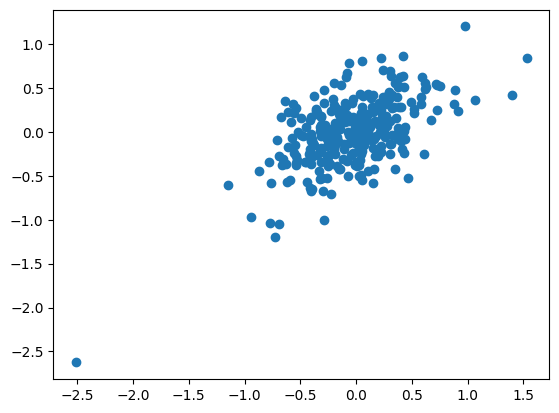

In [77]:
# A scatterplot of two similar vectors should indicate linearity
import matplotlib.pyplot as plt # Make a simple plot
plt.scatter(apple.vector, banana.vector) # Show the result

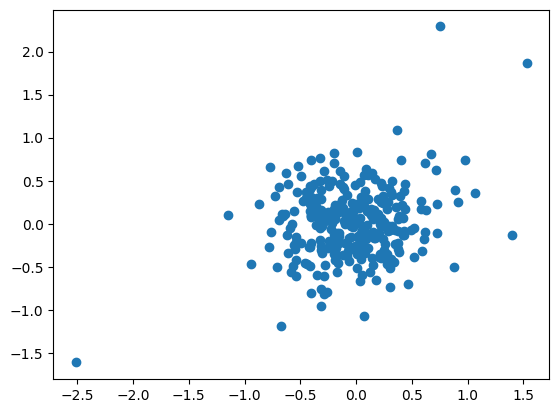

In [78]:
# A scatterplot of two different vectors should be a circular cloud
plt.scatter(apple.vector, car.vector)

In [79]:
# There are many options for a cosine similarity calculation,
# including this one from scipy that we are not using here.
from scipy.spatial.distance import cosine

In [80]:
# With some help from numpy, we can calculate our own cosine scores using a vector dot product, computed with np.dot()
import numpy as np
def cosine(x,y):
    return np.dot(x,y) / (np.sqrt(np.dot(x,x)) * np.sqrt(np.dot(y,y)))

In [81]:
# One of the notable aspects of word vectors is the possibility of doing simple math to create analogies.
man = nlp_lg.vocab["man"].vector
woman = nlp_lg.vocab["woman"].vector
king = nlp_lg.vocab["king"].vector
queen = nlp_lg.vocab["queen"].vector

analogy = king - man + woman # Calculate the analogy with vector math
cosine(analogy, queen)

np.float32(0.78808445)

In [82]:
# Let's compare the analogy to another vector
cosine(analogy, car.vector) # Note how we needed to extract the vector for car

np.float32(0.13843127)

In [83]:
# Question 5.30: Now you obtain the vectors for Paris, France, Berlin, and Germany.

# Solution
Paris = nlp_lg.vocab["Paris"].vector
France = nlp_lg.vocab["France"].vector
Berlin = nlp_lg.vocab["Berlin"].vector
Germany = nlp_lg.vocab["Germany"].vector

In [84]:
# Question 5.31: Compute an analogy using three of these vectors

# Solution

analogy1 = Paris - France + Berlin # Calculate the analogy with vector math


In [85]:
# Question 5.32: Find the cosine similarity of the analogy with the fourth vector

# Solution
cosine(analogy1, Germany)

np.float32(0.4639213)

In [86]:
# Question 5.33: Find the cosine similarity of the analogy with banana.

# Solution
cosine(analogy1, banana.vector)

np.float32(0.11703637)

# Section 5.9: Sentence Similarity

As you have seen above, word vectors for similar words have similar patterns and though we don't know what each position in a vector signifies, these patterns support simple vector math for analogical reasoning. This suggests the possibility, which research seems to back up that averaging two or more vectors provides a semantic summary of the vectors. Document and span objects in spaCy have attached vectors that repesents the average of all of the component word vectors.

In [87]:
doc1 = nlp_lg("The quick brown fox jumps over the lazy dog.")
doc2 = nlp_lg("The lazy dog jumps over the quick brown fox.")
doc1.similarity(doc1)

1.0

In [88]:
# We can also manually calculate the cosine similarity. It should be transitive such that cosine(A,B) == cosine(B,A)
doc1_vec = doc1.vector
doc2_vec = doc2.vector
cosine(doc2_vec, doc1_vec), cosine(doc1_vec, doc2_vec)

(np.float32(1.0), np.float32(1.0))

In [89]:
# Let's get the similarity of the first sentence (doc1) with a new sentence.
docdiff = nlp_lg("Four score and seven years ago, our fathers brought forth upon this continent a new nation.")
cosine(docdiff.vector, doc1_vec)

np.float32(0.72331554)

In [90]:
# The semantics can be quite muddled by the averaging process. These two sentences express the opposite sentiment
doc3 = nlp_lg("I like snow")
doc4 = nlp_lg("I hate snow")
cosine(doc3.vector, doc4.vector)

np.float32(0.94878143)

Think through the implication of the result shown above. By creating an averaged word vector, we have given every word in a sentence the same weight in creating the new summary vector. Another exercise to try would be to take out the word snow and see how that changes the results.

In [91]:
# Question 5.34:
# Recalculate the previous cell after removing the word snow from both sentences.
# Feel free to try any other experiments of interest.

# Solution
doc3 = nlp_lg("I like")
doc4 = nlp_lg("I hate")
cosine(doc3.vector, doc4.vector)

np.float32(0.9049743)

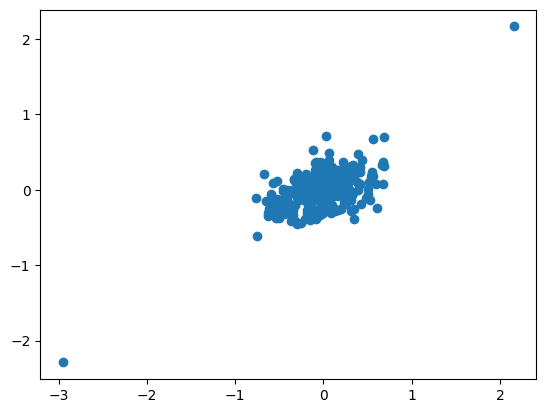

In [92]:
# And here we see part of why this is so.
plt.scatter(nlp_lg.vocab["hate"].vector, nlp_lg.vocab["like"].vector)

In [93]:
# Question 5.35:
# Create nlp_lg() objects for three sentences that you write yourself or copy and paste from the web.

# Solution
docf = nlp_lg("I like football")
docs = nlp_lg("I play fantasy sports")
docg = nlp_lg("I gamble all the time")



In [94]:
# Question 5.36: Compute pairwise similarities for their vector summaries

# Solution
cosine(docf.vector, docs.vector)

np.float32(0.83923966)

In [95]:
cosine(docf.vector, docg.vector)

np.float32(0.7767571)

In [96]:
cosine(docs.vector, docg.vector)

np.float32(0.7225183)

In [97]:
# Question 5.37: Add a comment explaining what you see

# Solution
# Liking football is  related to playing fantasy sports.
# However football is more related to gambling than is fantasy sports and gambling 

# Section 5.10: Processing pipelines

Throughout this lab, we have been calling a function that we often referred to as **nlp().** After loading a spaCy language model such as **en_core_web_sm**, we instantiate a pipeline object to conduct all of the steps that we will routinely want to accomplish with a document.

The **spaCy** pipeline can be modified to change the default components or to add new components. Here's a list of the default components from the spaCy documentation:

| NAME      | COMPONENT         | CREATES                                             | DESCRIPTION                                      |
|:-----------|:-------------------|:-----------------------------------------------------|:--------------------------------------------------|
| tokenizer | Tokenizer         | Doc                                                 | Segment text into tokens.                        |
| tagger    | Tagger            | Doc[i].tag                                          | Assign part-of-speech tags.                      |
| parser    | DependencyParser  | Doc[i].head, Doc[i].dep, Doc.sents, Doc.noun_chunks | Assign dependency labels.                        |
| ner       | EntityRecognizer  | Doc.ents, Doc[i].ent_iob, Doc[i].ent_type           | Detect and label named entities.                 |
| textcat   | TextCategorizer   | Doc.cats                                            | Assign document labels.                          |
| …         | custom components | `Doc._.xxx`, `Token._.xxx`, `Span._.xxx`                  | Assign custom attributes, methods or properties. |

In [98]:
# We can also examine the pipeline for an instantiated object like this:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x142c450d790>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x142c450d970>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x142c4505e70>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x142ef5fd5d0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x142c4490c90>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x142c4505cb0>)]

You may notice in the list above that there is no tokenizer. In the spaCy pipeline model, it is assumed that tokenization was accomplished before pipeline processing begins. All pipeline elements receive a doc object, work on it and return a doc object. The tokenizer has a different kind of job becuase it receives a raw character string and returns a list of tokens. Thus, the language object has a different slot where the tokenizer is listed:

In [99]:
nlp.tokenizer

The spaCy pipeline was designed to balance simplicity and computational effort. Simplicity is important for getting started quickly with a language processing tasks, so the default pipeline contains all the stuff that most people need to address a realistic task. But if a component is not needed, it can save a lot of compute time to take a task out of the pipeline. Take a look at this example:

In [100]:
print(spacy.__version__) # Some version dependent stuff below

3.8.7


In [101]:
# Let's skip the entity recognition and the dependency parsing
nlp_simple = spacy.load("en_core_web_sm", exclude=["parser","ner"])
# Version 3 also adds facilities for enabling and disabling pipeline elements on the fly.
print(nlp_simple.pipeline) # SHow the pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x00000142F3338B90>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x00000142F3339070>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x00000142F3032C90>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x00000142F2FC5550>)]


In [102]:
# Groucho Marx is an entity, but this pipeline doesn't detect it, because the ner is disabled.
simple_doc = nlp_simple("Groucho Marx shot an elephant in his underpants.")
[ent for ent in simple_doc.ents]

[]

In [103]:
# And the pipeline did not do dependency parsing
[token.dep_ for token in simple_doc]

['', '', '', '', '', '', '', '', '']

In [104]:
# Question 5.38:
# Process a sentence and show that the entity recognition is disabled.

# Solution
simple_doc = nlp_simple("Two albums by British rock band Queen, A Night at the Opera (1975) and A Day at the Races (1976), are named after Marx Brothers films.")
[ent for ent in simple_doc.ents]

[]

# Adding Custom Pipeline Components

A component receives a **Doc object** and can modify it. By adding a component to the pipeline, you’ll get access to the Doc at any point during processing, instead of only being able to modify it afterwards. You can control the position of the new component in the pipeline with the last, first, before, and after arguments.

| ARGUMENT | TYPE | DESCRIPTION                                          |
|----------|------|------------------------------------------------------|
| doc      | Doc  | The Doc object processed by the previous component.  |
| RETURNS  | Doc  | The Doc object processed by this pipeline component. |

| ARGUMENT | TYPE    | DESCRIPTION                                                        |
|----------|---------|--------------------------------------------------------------------|
| last     | bool    | If set to True, component is added last in the pipeline (default). |
| first    | bool    | If set to True, component is added first in the pipeline.          |
| before   | unicode | String name of component to add the new component before.          |
| after    | unicode | String name of component to add the new component after.           |

In [105]:
import spacy
from spacy.tokens import Doc, Span, Token
import json
from spacy.language import Language

# Here's a custom function for removing stopwords, starting with a decorator
@Language.component("remstop_component")
def remove_stopwords(doc):
    # A pipeline element would not normally contain this kind of diagnostic
    # but we just want to show what the method received before processing.
    print("Before stopwords_removal, this doc is: {}".format(doc))
    space_list = [t.whitespace_  for t in doc if not t.is_stop]
    new_doc = Doc(doc.vocab,
              words=[t.orth_ for t in doc if not t.is_stop],
              spaces=space_list
              )
    return new_doc

# Instantiate a default pipeline
nlp = spacy.load("en_core_web_sm")

# Add our stopword finder/remover
nlp.add_pipe("remstop_component", name="stopwords_removal", first=True)

# Show the pipeline
print(nlp.pipe_names)  # ['stopwords_removal', 'tagger', 'parser', 'ner']

# Process a sentence
doc = nlp("This is a sentence.")

# See the result
print("After stopwords_removal, this doc is: {}".format(doc))

['stopwords_removal', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
Before stopwords_removal, this doc is: This is a sentence.
After stopwords_removal, this doc is: sentence.


# Attribute and Method Extensions

For advanced users, it is possible to add new attributes and methods to spaCy objects. In a complex language processing system, additional attributes and methods could be used to annotate, control, and modify specialized features of a document or other spaCy object.

In [106]:
# Here we set a new attribute, called "classified" to indicate whether a document's contents should be kept secret.
Doc.set_extension("classified", default=True)
assert doc._.classified
# Note that this block will throw an error if it is run more than once

In [107]:
# Now we can set or retrieve the attribute
doc._.classified = False
doc._.classified

False

In [108]:
# Here we set an extension that is a method rather than an attribute Remember that a lambda function is a temporary function that we can use
# to perform small tasks without having to use def.
Doc.set_extension("experiment", method=lambda doc, name: "X_{}".format(name))
assert doc._.experiment("plane") == "X_plane"

In [109]:
# Question 5.39: Set a new extension method that reverses the letters of the input.

# Solution
# Reference: Gemini
Doc.set_extension("reverse_letters", method=lambda doc_instance, text_input: text_input[::-1])

In [110]:
# Test the extension method
input_text = "hello world"
reversed_text = doc._.reverse_letters(input_text)
print(f"Original input: '{input_text}'")
print(f"Reversed output: '{reversed_text}'")

Original input: 'hello world'
Reversed output: 'dlrow olleh'
